In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'/Users/maxwell/Documents/CMU/Courses/Mini 5/ML Capstone/ML-Capstone/Code'

In [3]:
pos = pd.read_csv('../data/CMU Data.csv', parse_dates = ['Timestamp'])

## Position Dataset

In [4]:
pos.head()

,Timestamp,Libor 1Y,JPY,EUR,SPX,VIX,1Y OIS,Positioning,lev Positioning,Signal
0,2020-09-10,0.243,0.94165,0.84195,3405.97,28.45,0.055,NaN,NaN,NaN
1,2020-09-09,0.243,0.94175,0.84725,3398.96,28.81,0.055,NaN,NaN,NaN
2,2020-09-08,0.240,0.94310,0.84915,3331.84,31.46,0.050,NaN,NaN,NaN
3,2020-09-07,0.237,0.94105,0.84615,NaN,NaN,NaN,NaN,NaN,5.291036e+08
4,2020-09-04,0.240,0.94125,0.84465,3426.96,30.75,0.052,NaN,NaN,1.030498e+09


In [5]:
y = pos[['Timestamp', 'Positioning']]
lev_y = pos[['Timestamp', 'lev Positioning']]

In [6]:
spx = pos[['Timestamp', 'SPX']]

In [7]:
pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2269 entries, 0 to 2268
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        2269 non-null   datetime64[ns]
 1   Libor 1Y         2269 non-null   float64       
 2   JPY              2269 non-null   float64       
 3   EUR              2269 non-null   float64       
 4   SPX              2187 non-null   float64       
 5   VIX              2187 non-null   float64       
 6   1Y OIS           2200 non-null   float64       
 7   Positioning      452 non-null    float64       
 8   lev Positioning  452 non-null    float64       
 9   Signal           1230 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 177.4 KB


### Check NA

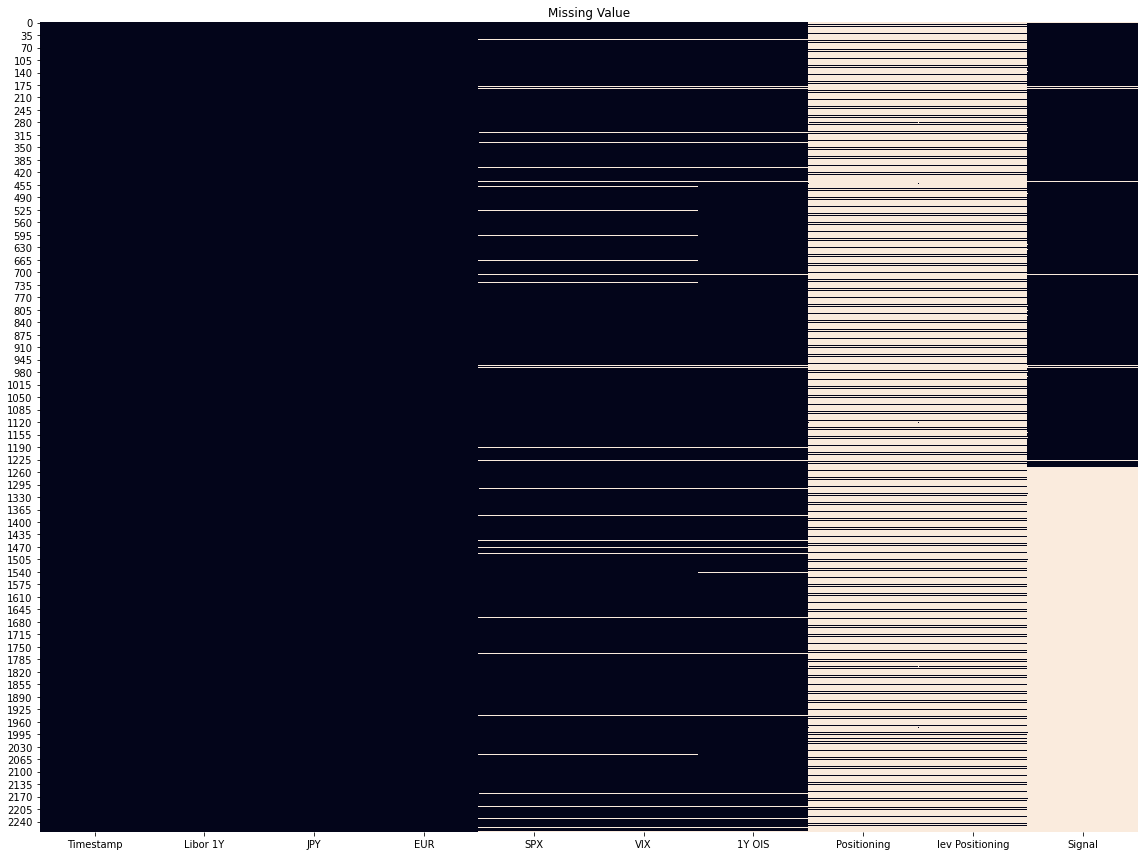

In [8]:
#Missing value plot
plt.figure(figsize=(16,12))
sns.heatmap(pos.isnull(),cbar=False)
#sns.heatmap(df.iloc[np.unique(np.where(df.isnull())[0]),:].isnull(),cbar=False)
plt.title('Missing Value')
plt.tight_layout()
plt.savefig('Missing Value',dpi=300)
plt.show()

In [9]:
pos.head()

,Timestamp,Libor 1Y,JPY,EUR,SPX,VIX,1Y OIS,Positioning,lev Positioning,Signal
0,2020-09-10,0.243,0.94165,0.84195,3405.97,28.45,0.055,NaN,NaN,NaN
1,2020-09-09,0.243,0.94175,0.84725,3398.96,28.81,0.055,NaN,NaN,NaN
2,2020-09-08,0.240,0.94310,0.84915,3331.84,31.46,0.050,NaN,NaN,NaN
3,2020-09-07,0.237,0.94105,0.84615,NaN,NaN,NaN,NaN,NaN,5.291036e+08
4,2020-09-04,0.240,0.94125,0.84465,3426.96,30.75,0.052,NaN,NaN,1.030498e+09


### Stress Spread

In [10]:
credit_spread = pos['Libor 1Y'] - pos['1Y OIS']
pos['credit_spread'] = credit_spread
credit_spread.describe()

count    2200.000000
mean        0.251427
std         0.091814
min         0.100000
25%         0.174750
50%         0.235500
75%         0.317000
max         0.642000
dtype: float64

In [11]:
credit_spread

0       0.188
1       0.188
2       0.190
3         NaN
4       0.188
        ...  
2264    0.532
2265    0.569
2266    0.572
2267    0.578
2268      NaN
Length: 2269, dtype: float64

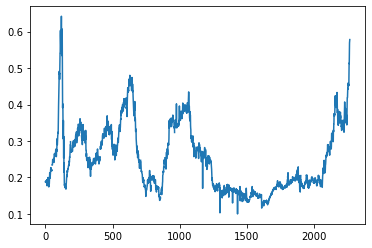

In [12]:
plt.plot(credit_spread[::-1])

In [13]:
np.sum(credit_spread.isnull())

69

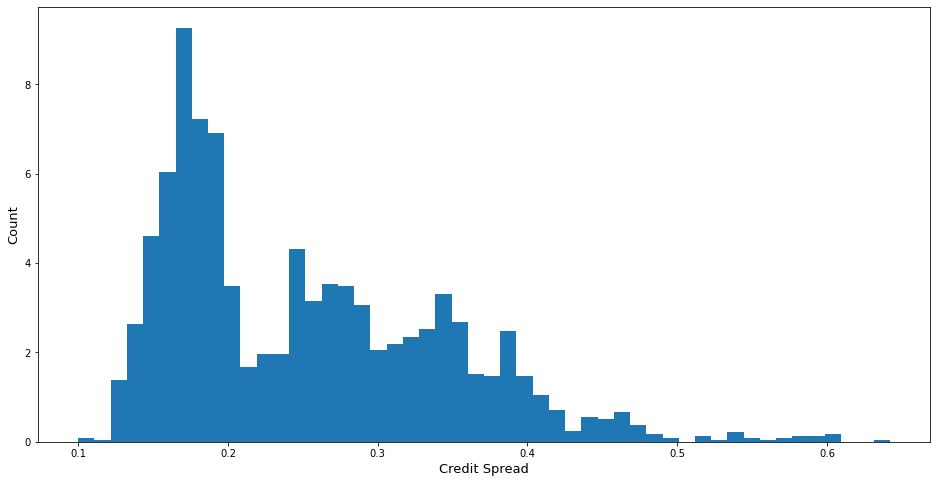

In [14]:
fig = plt.figure(figsize=[16,8])
axs = fig.subplots(1,1)
axs.hist(credit_spread, density = True, bins = 50)
axs.set_ylabel("Count", size = 13)
axs.set_xlabel("Credit Spread", size = 13)
plt.show()

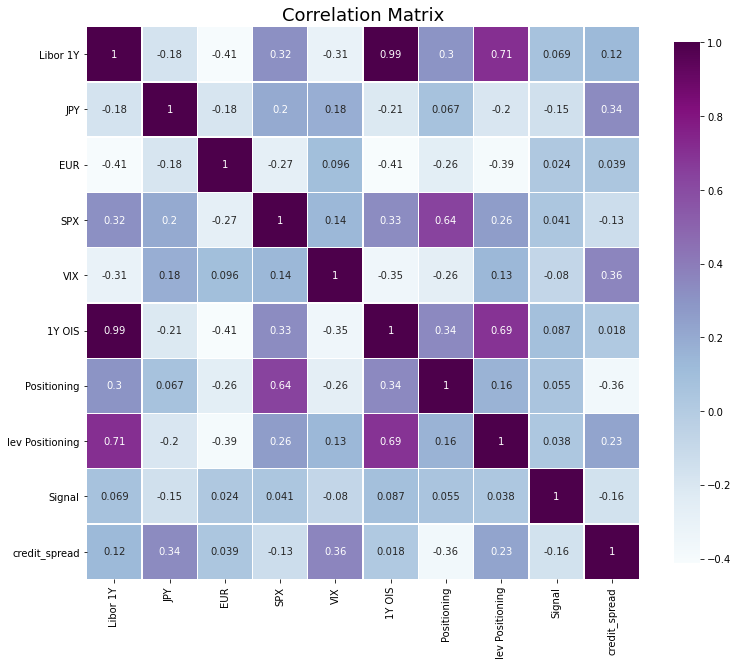

In [15]:
#Correlation
# Compute the correlation matrix
labeled=pos.dropna()
corr = labeled.iloc[:,1:].corr()

#sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 11))
ax = sns.heatmap(corr, square=True,linewidths=.3,annot=True,cbar_kws={"shrink": .7}, cmap="BuPu")
# Draw the heatmap with the mask and correct aspect ratio
plt.tight_layout()
plt.title('Correlation Matrix',size=18)
plt.show()

In [16]:
pos['num_week'] = pos['Timestamp'].apply(lambda x: x.isocalendar()[1])

In [17]:
pos = pos.iloc[::-1].reset_index(drop = True)
pos.head(10)

,Timestamp,Libor 1Y,JPY,EUR,SPX,VIX,1Y OIS,Positioning,lev Positioning,Signal,credit_spread,num_week
0,2012-01-02,0.681,1.30055,0.773455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2012-01-03,0.693,1.30395,0.766254,1277.06,22.97,0.1150,144716.0,-43317.0,NaN,0.5780,1
2,2012-01-04,0.684,1.30380,0.772708,1277.30,22.22,0.1120,NaN,NaN,NaN,0.5720,1
3,2012-01-05,0.675,1.29500,0.782442,1281.06,21.48,0.1060,NaN,NaN,NaN,0.5690,1
4,2012-01-06,0.639,1.29885,0.786133,1277.81,20.63,0.1070,NaN,NaN,NaN,0.5320,1
5,2012-01-09,0.612,1.30140,0.783239,1280.70,21.07,0.1000,NaN,NaN,NaN,0.5120,2
6,2012-01-10,0.606,1.30150,0.782932,1292.08,20.69,0.0925,147039.0,-56227.0,NaN,0.5135,2
7,2012-01-11,0.577,1.30055,0.787123,1292.48,21.05,0.0970,NaN,NaN,NaN,0.4800,2
8,2012-01-12,0.546,1.30295,0.779697,1295.50,20.47,0.0940,NaN,NaN,NaN,0.4520,2
9,2012-01-13,0.546,1.30000,0.788799,1289.09,20.91,0.0925,NaN,NaN,NaN,0.4535,2


## SPX_ETF Dataset

In [20]:
spx_etf_flow = pd.read_csv('../data/SPX_ETFFlows.csv', parse_dates = ['Date'])

In [22]:
spx_etf_flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2948 non-null   datetime64[ns]
 1   SPY Flows  2948 non-null   float64       
 2   IVV        2947 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 69.2 KB


In [23]:
spx_etf_flow.describe()

,SPY Flows,IVV
count,2948.000000,2947.000000
mean,0.236449,35.778398
std,1819.660484,429.420049
min,-8559.760000,-6901.240000
25%,-1000.210000,-26.704050
50%,6.507200,0.000000
75%,934.104000,91.539300
max,12611.300000,6809.120000


### Check NA

In [24]:
spx_etf_flow.isnull().sum()

Date         0
SPY Flows    0
IVV          1
dtype: int64

In [25]:
np.where(spx_etf_flow.isnull())

(array([964]), array([2]))

In [26]:
spx_etf_flow.iloc[960:970,:]

,Date,SPY Flows,IVV
960,2012-10-23,-1831.3100,7.0978
961,2012-10-24,-1578.9700,-56.6191
962,2012-10-25,728.2290,21.2961
963,2012-10-26,0.0000,418.5480
964,2012-10-30,0.0000,NaN
965,2012-10-31,-925.7660,149.0040
966,2012-11-01,1528.9200,-638.4860
967,2012-11-02,-1592.4700,-170.5560
968,2012-11-05,-28.3767,-92.5981
969,2012-11-06,1823.1200,-14.3589


### Distribution Plot

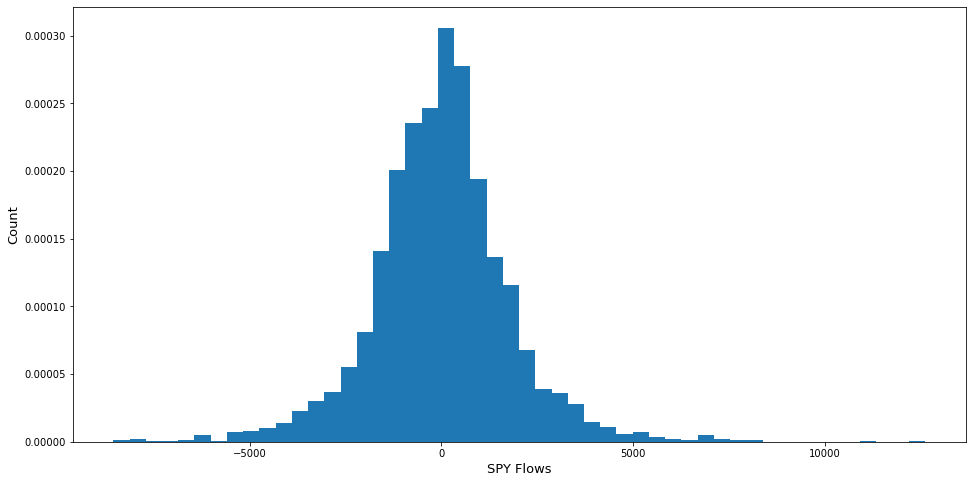

In [68]:
fig = plt.figure(figsize=[16,8])
axs = fig.subplots(1,1)
axs.hist(spx_etf_flow['SPY Flows'], density = True, bins = 50)
axs.set_ylabel("Count", size = 13)
axs.set_xlabel("SPY Flows", size = 13)
plt.show()

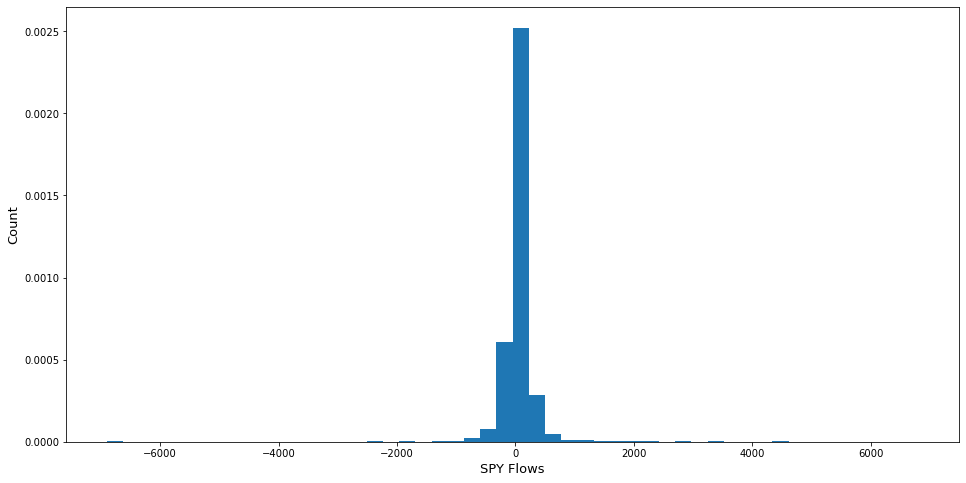

In [69]:
fig = plt.figure(figsize=[16,8])
axs = fig.subplots(1,1)
axs.hist(spx_etf_flow['IVV'], density = True, bins = 50)
axs.set_ylabel("Count", size = 13)
axs.set_xlabel("SPY Flows", size = 13)
plt.show()

### Time Series Plot

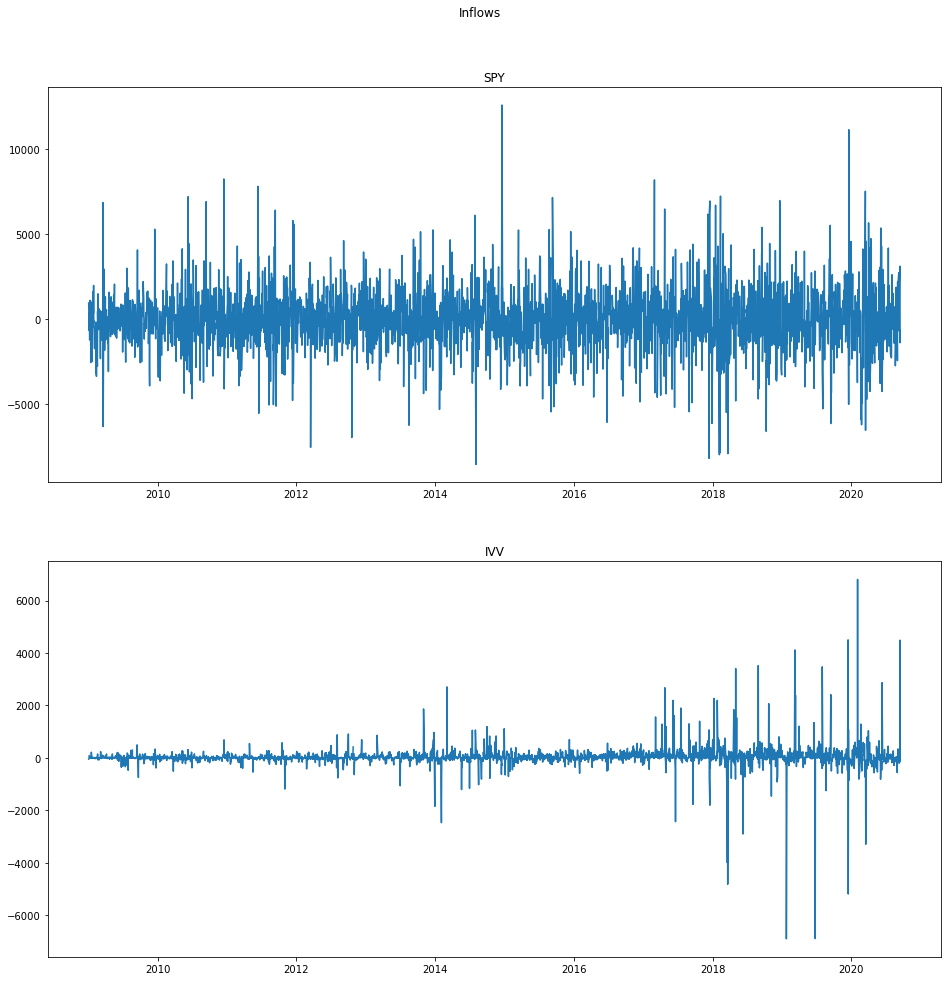

In [27]:
fig = plt.figure(figsize = [16,16])
axs = fig.subplots(2,1)
axs[0].plot(spx_etf_flow.Date, spx_etf_flow['SPY Flows'])
axs[0].set_title("SPY")
axs[1].plot(spx_etf_flow.Date, spx_etf_flow['IVV'])
axs[1].set_title("IVV")
#fig.tight_layout()
fig.suptitle("Inflows",y = 0.95)
plt.show()

### Autocorrelation

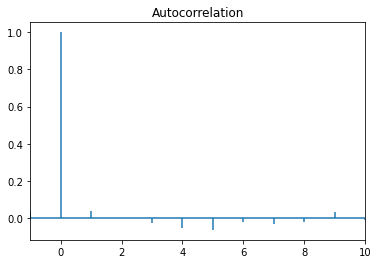

In [28]:
plt.acorr(spx_etf_flow['SPY Flows'])
plt.xlim((-1,10))
plt.title("Autocorrelation")
plt.show()

In [29]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(spx_etf_flow['SPY Flows'], lags = 10, return_df = False)

(array([ 3.64482458,  3.64489143,  5.76073943, 13.69593953, 25.82549626,
        27.22710683, 30.4111091 , 32.07071265, 34.93620441, 35.2523644 ]),
 array([5.62437287e-02, 1.61629966e-01, 1.23849081e-01, 8.33147395e-03,
        9.64651538e-05, 1.31286305e-04, 7.98079334e-05, 9.04640480e-05,
        6.11470111e-05, 1.13067340e-04]))

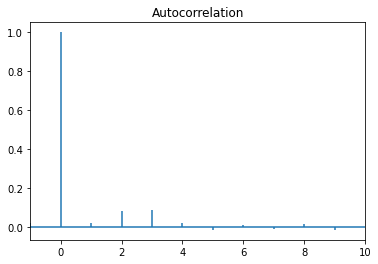

In [30]:
plt.acorr(spx_etf_flow['IVV'].dropna())
plt.xlim((-1,10))
plt.title("Autocorrelation")
plt.show()

In [31]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(spx_etf_flow['IVV'].dropna(), lags = 10, return_df = False)

(array([ 0.83896606, 18.37365096, 38.31684805, 39.26837796, 40.37075948,
        40.41330984, 41.08936552, 41.34629285, 42.5300765 , 42.59471663]),
 array([3.59692646e-01, 1.02379355e-04, 2.42190850e-08, 6.13151047e-08,
        1.25711949e-07, 3.77781108e-07, 7.78231558e-07, 1.79568805e-06,
        2.62869284e-06, 5.87505848e-06]))

### Correlation with y

__Merge the dataset__

In [32]:
spx_spxetf = spx.merge(spx_etf_flow, left_on = 'Timestamp', right_on = 'Date')

In [33]:
spx_spxetf

,Timestamp,SPX,Date,SPY Flows,IVV
0,2020-09-10,3405.97,2020-09-10,-701.2430,-201.1620
1,2020-09-09,3398.96,2020-09-09,-679.7330,-17.0630
2,2020-09-08,3331.84,2020-09-08,2731.9000,-33.4500
3,2020-09-04,3426.96,2020-09-04,2090.0200,344.0300
4,2020-09-03,3455.06,2020-09-03,483.6030,0.0000
...,...,...,...,...,...
2183,2012-01-09,1280.70,2012-01-09,38.4111,179.8800
2184,2012-01-06,1277.81,2012-01-06,-1954.5900,-25.6385
2185,2012-01-05,1281.06,2012-01-05,6.3999,44.9640
2186,2012-01-04,1277.30,2012-01-04,-1091.4300,70.4531


In [34]:
spx_spxetf.drop('Date', inplace = True, axis = 1)

In [35]:
spx_spxetf = spx_spxetf.iloc[::-1].reset_index(drop = True)
spx_spxetf

,Timestamp,SPX,SPY Flows,IVV
0,2012-01-03,1277.06,1065.4900,249.6870
1,2012-01-04,1277.30,-1091.4300,70.4531
2,2012-01-05,1281.06,6.3999,44.9640
3,2012-01-06,1277.81,-1954.5900,-25.6385
4,2012-01-09,1280.70,38.4111,179.8800
...,...,...,...,...
2183,2020-09-03,3455.06,483.6030,0.0000
2184,2020-09-04,3426.96,2090.0200,344.0300
2185,2020-09-08,3331.84,2731.9000,-33.4500
2186,2020-09-09,3398.96,-679.7330,-17.0630


In [36]:
spx_spxetf['SPXRet'] = np.log(spx_spxetf.SPX).diff()

In [37]:
spx_spxetf.dropna(inplace = True)
spx_spxetf

,Timestamp,SPX,SPY Flows,IVV,SPXRet
1,2012-01-04,1277.30,-1091.4300,70.4531,0.000188
2,2012-01-05,1281.06,6.3999,44.9640,0.002939
3,2012-01-06,1277.81,-1954.5900,-25.6385,-0.002540
4,2012-01-09,1280.70,38.4111,179.8800,0.002259
5,2012-01-10,1292.08,1162.6200,45.3701,0.008847
...,...,...,...,...,...
2183,2020-09-03,3455.06,483.6030,0.0000,-0.035758
2184,2020-09-04,3426.96,2090.0200,344.0300,-0.008166
2185,2020-09-08,3331.84,2731.9000,-33.4500,-0.028149
2186,2020-09-09,3398.96,-679.7330,-17.0630,0.019945


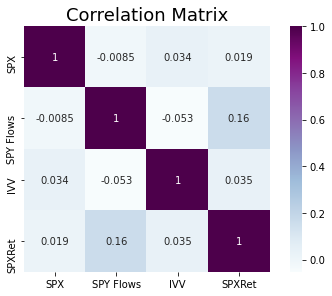

In [38]:
#sns.set_theme(style="white")
f, ax = plt.subplots()
ax = sns.heatmap(spx_spxetf.corr(), square=True,annot=True, cmap="BuPu")
# Draw the heatmap with the mask and correct aspect ratio
plt.tight_layout()
plt.title('Correlation Matrix',size=18)
plt.show()

In [40]:
spxetf_y_daily = spx_spxetf.merge(y, on = "Timestamp")
spxetf_y_daily = spxetf_y_daily.merge(lev_y, on = "Timestamp")

In [41]:
spxetf_y_daily

,Timestamp,SPX,SPY Flows,IVV,SPXRet,Positioning,lev Positioning
0,2012-01-04,1277.30,-1091.4300,70.4531,0.000188,NaN,NaN
1,2012-01-05,1281.06,6.3999,44.9640,0.002939,NaN,NaN
2,2012-01-06,1277.81,-1954.5900,-25.6385,-0.002540,NaN,NaN
3,2012-01-09,1280.70,38.4111,179.8800,0.002259,NaN,NaN
4,2012-01-10,1292.08,1162.6200,45.3701,0.008847,147039.0,-56227.0
...,...,...,...,...,...,...,...
2180,2020-09-03,3455.06,483.6030,0.0000,-0.035758,NaN,NaN
2181,2020-09-04,3426.96,2090.0200,344.0300,-0.008166,NaN,NaN
2182,2020-09-08,3331.84,2731.9000,-33.4500,-0.028149,NaN,NaN
2183,2020-09-09,3398.96,-679.7330,-17.0630,0.019945,NaN,NaN


__Scatter plot__

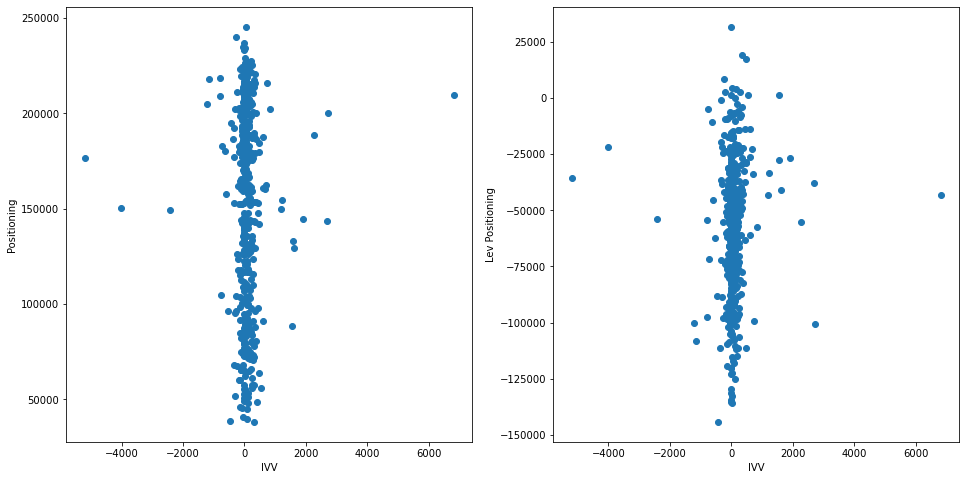

In [62]:
fig = plt.figure(figsize = [16,8])
axs = fig.subplots(1,2)
axs[0].scatter(spxetf_y_daily.IVV, spxetf_y_daily.Positioning)
axs[1].scatter(spxetf_y_daily.IVV, spxetf_y_daily['lev Positioning'])
axs[0].set_ylabel('Positioning')
axs[1].set_ylabel('Lev Positioning')
axs[0].set_xlabel('IVV')
axs[1].set_xlabel('IVV')
plt.show()

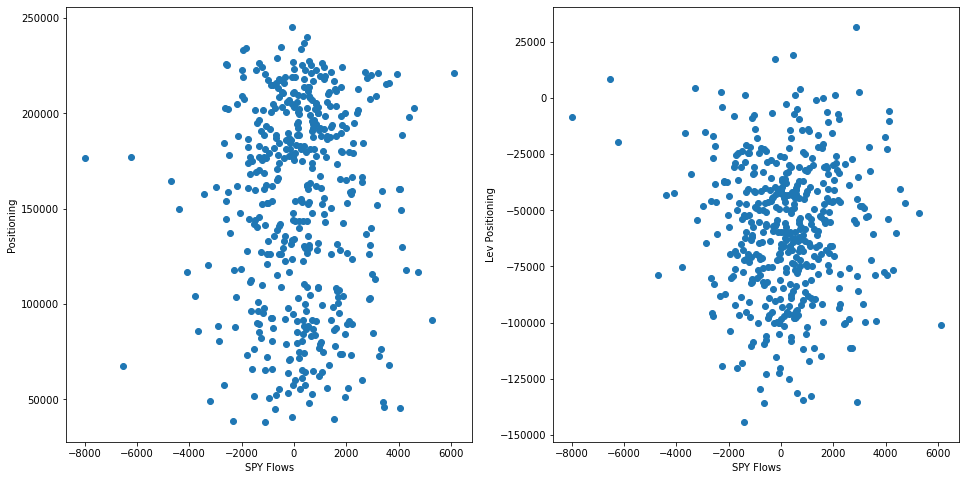

In [64]:
fig = plt.figure(figsize = [16,8])
axs = fig.subplots(1,2)
axs[0].scatter(spxetf_y_daily['SPY Flows'], spxetf_y_daily.Positioning)
axs[1].scatter(spxetf_y_daily['SPY Flows'], spxetf_y_daily['lev Positioning'])
axs[0].set_ylabel('Positioning')
axs[1].set_ylabel('Lev Positioning')
axs[0].set_xlabel('SPY Flows')
axs[1].set_xlabel('SPY Flows')
plt.show()

### Aggregate Data to Weekly

In [43]:
spxetf_y_daily.head(20)

,Timestamp,SPX,SPY Flows,IVV,SPXRet,Positioning,lev Positioning
0,2012-01-04,1277.30,-1091.4300,70.4531,0.000188,NaN,NaN
1,2012-01-05,1281.06,6.3999,44.9640,0.002939,NaN,NaN
2,2012-01-06,1277.81,-1954.5900,-25.6385,-0.002540,NaN,NaN
3,2012-01-09,1280.70,38.4111,179.8800,0.002259,NaN,NaN
4,2012-01-10,1292.08,1162.6200,45.3701,0.008847,147039.0,-56227.0
5,2012-01-11,1292.48,-38.7683,0.0000,0.000310,NaN,NaN
6,2012-01-12,1295.50,-226.6930,116.9860,0.002334,NaN,NaN
7,2012-01-13,1289.09,560.7000,-161.6790,-0.004960,NaN,NaN
8,2012-01-17,1293.67,536.8240,12.9808,0.003547,160317.0,-59704.0
9,2012-01-18,1308.04,778.3090,170.6390,0.011047,NaN,NaN


In [44]:
picker = spxetf_y_daily.Positioning.notnull()
spxetf_y_weekly = pd.concat([spxetf_y_daily['Timestamp'][picker], spxetf_y_daily[['SPY Flows', 'IVV', 'SPXRet']].cumsum()[picker], spxetf_y_daily[['Positioning', 'lev Positioning']][picker]], axis = 1)

In [45]:
spxetf_y_weekly = pd.concat([spxetf_y_daily.iloc[[0],2:],spxetf_y_weekly])
spxetf_y_weekly = spxetf_y_weekly[['Timestamp','SPY Flows','IVV','SPXRet','Positioning','lev Positioning']] 

In [47]:
daycnt = pd.Series(spxetf_y_weekly.index).diff()
spxetf_y_weekly = spxetf_y_weekly.reset_index(drop = True)
spxetf_y_weekly['daycnt'] = daycnt
spxetf_y_weekly

,Timestamp,SPY Flows,IVV,SPXRet,Positioning,lev Positioning,daycnt
0,NaT,-1091.4300,70.4531,0.000188,NaN,NaN,NaN
1,2012-01-10,-1838.5890,315.0287,0.011693,147039.0,-56227.0,4.0
2,2012-01-17,-1006.5263,283.3165,0.012923,160317.0,-59704.0,4.0
3,2012-01-24,80.1597,493.5110,0.029010,176437.0,-57525.0,5.0
4,2012-01-31,-2068.9533,434.1428,0.027305,177254.0,-59523.0,5.0
...,...,...,...,...,...,...,...
447,2020-08-04,18227.9992,98033.5095,0.951177,122424.0,-67099.0,5.0
448,2020-08-11,19499.1027,98470.1615,0.959363,134130.0,-66880.0,5.0
449,2020-08-18,17141.1937,97911.4960,0.976049,135808.0,-62915.0,5.0
450,2020-08-25,15710.5867,97621.5520,0.991807,142723.0,-66074.0,5.0


In [48]:
spxetf_y_weekly['SPY Flows'] = spxetf_y_weekly['SPY Flows'].diff() #/ spxetf_y_weekly['daycnt']
spxetf_y_weekly['IVV'] = spxetf_y_weekly['IVV'].diff() #/ spxetf_y_weekly['daycnt']
spxetf_y_weekly['SPXRet'] = spxetf_y_weekly['SPXRet'].diff() #/ spxetf_y_weekly['daycnt']
spxetf_y_weekly

,Timestamp,SPY Flows,IVV,SPXRet,Positioning,lev Positioning,daycnt
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-10,-747.1590,244.5756,0.011505,147039.0,-56227.0,4.0
2,2012-01-17,832.0627,-31.7122,0.001230,160317.0,-59704.0,4.0
3,2012-01-24,1086.6860,210.1945,0.016087,176437.0,-57525.0,5.0
4,2012-01-31,-2149.1130,-59.3682,-0.001705,177254.0,-59523.0,5.0
...,...,...,...,...,...,...,...
447,2020-08-04,-1308.4300,-50.5270,0.026996,122424.0,-67099.0,5.0
448,2020-08-11,1271.1035,436.6520,0.008187,134130.0,-66880.0,5.0
449,2020-08-18,-2357.9090,-558.6655,0.016685,135808.0,-62915.0,5.0
450,2020-08-25,-1430.6070,-289.9440,0.015758,142723.0,-66074.0,5.0


In [49]:
spxetf_y_weekly.dropna(inplace = True)
spxetf_y_weekly = spxetf_y_weekly.reset_index(drop = True)
spxetf_y_weekly

,Timestamp,SPY Flows,IVV,SPXRet,Positioning,lev Positioning,daycnt
0,2012-01-10,-747.1590,244.5756,0.011505,147039.0,-56227.0,4.0
1,2012-01-17,832.0627,-31.7122,0.001230,160317.0,-59704.0,4.0
2,2012-01-24,1086.6860,210.1945,0.016087,176437.0,-57525.0,5.0
3,2012-01-31,-2149.1130,-59.3682,-0.001705,177254.0,-59523.0,5.0
4,2012-02-07,-809.2950,-247.0442,0.026052,196292.0,-66939.0,5.0
...,...,...,...,...,...,...,...
446,2020-08-04,-1308.4300,-50.5270,0.026996,122424.0,-67099.0,5.0
447,2020-08-11,1271.1035,436.6520,0.008187,134130.0,-66880.0,5.0
448,2020-08-18,-2357.9090,-558.6655,0.016685,135808.0,-62915.0,5.0
449,2020-08-25,-1430.6070,-289.9440,0.015758,142723.0,-66074.0,5.0


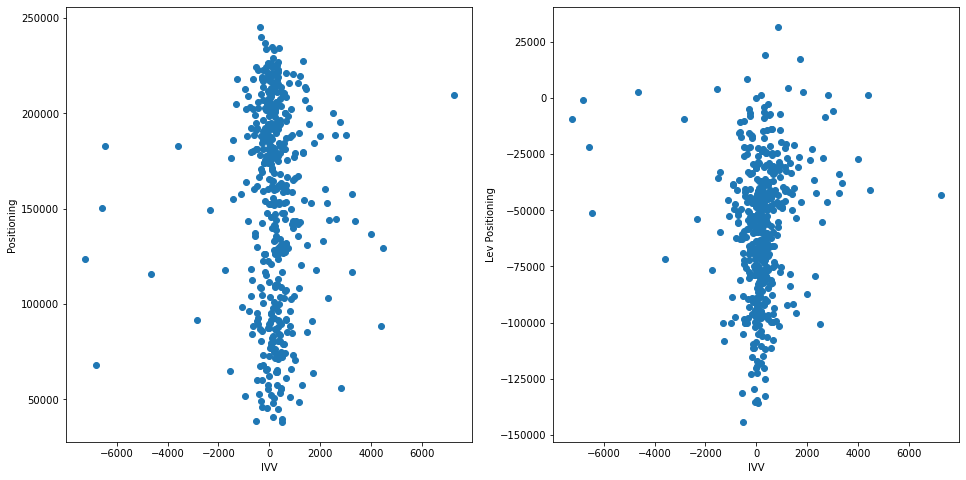

In [65]:
fig = plt.figure(figsize = [16,8])
axs = fig.subplots(1,2)
axs[0].scatter(spxetf_y_weekly.IVV, spxetf_y_weekly.Positioning)
axs[1].scatter(spxetf_y_weekly.IVV, spxetf_y_weekly['lev Positioning'])
axs[0].set_ylabel('Positioning')
axs[1].set_ylabel('Lev Positioning')
axs[0].set_xlabel('IVV')
axs[1].set_xlabel('IVV')
plt.show()

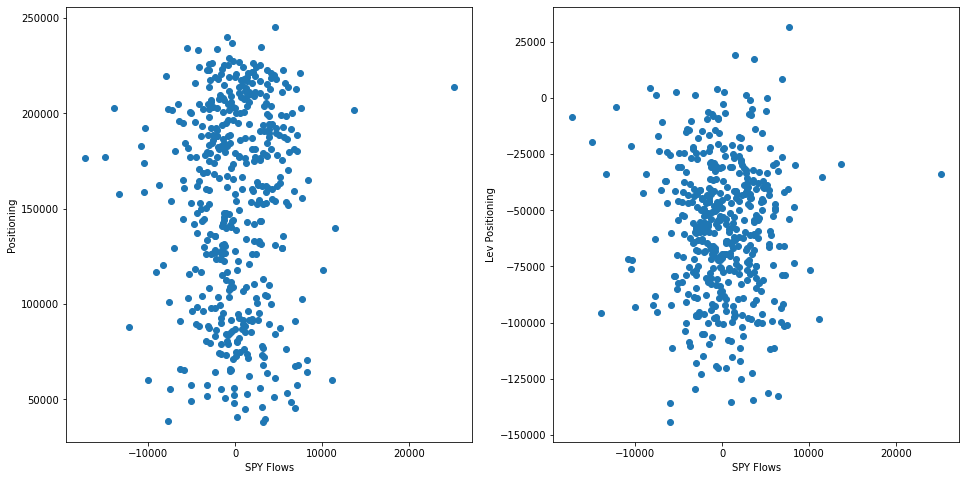

In [66]:
fig = plt.figure(figsize = [16,8])
axs = fig.subplots(1,2)
axs[0].scatter(spxetf_y_weekly['SPY Flows'], spxetf_y_weekly.Positioning)
axs[1].scatter(spxetf_y_weekly['SPY Flows'], spxetf_y_weekly['lev Positioning'])
axs[0].set_ylabel('Positioning')
axs[1].set_ylabel('Lev Positioning')
axs[0].set_xlabel('SPY Flows')
axs[1].set_xlabel('SPY Flows')
plt.show()

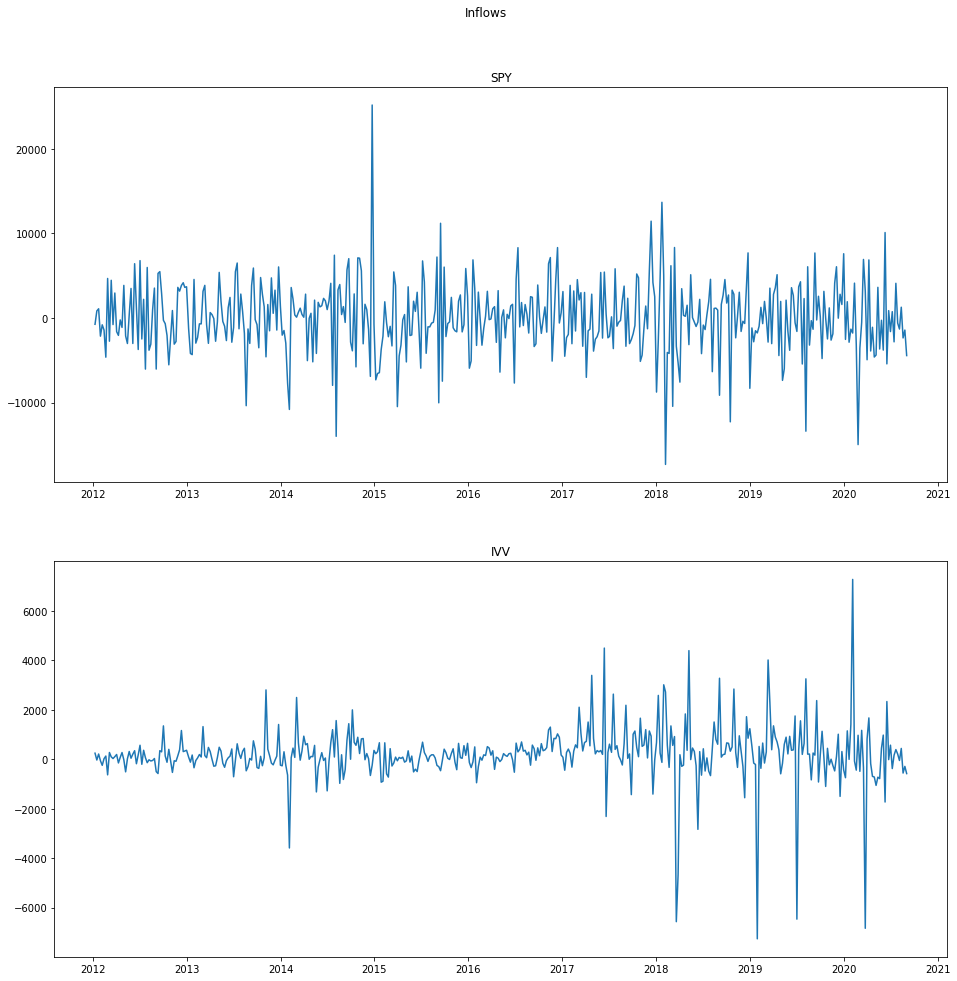

In [51]:
fig = plt.figure(figsize = [16,16])
axs = fig.subplots(2,1)
axs[0].plot(spxetf_y_weekly.Timestamp, spxetf_y_weekly['SPY Flows'])
axs[0].set_title("SPY")
axs[1].plot(spxetf_y_weekly.Timestamp, spxetf_y_weekly['IVV'])
axs[1].set_title("IVV")
#fig.tight_layout()
fig.suptitle("Inflows",y = 0.95)
plt.show()